In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import plotly.express as px


pd.options.display.float_format='{:,.2f}'.format
data=pd.read_csv('..\zoopla_scraper\zoopla_scraper\spiders\zoopla_edinburgh.csv')
data.index.rename('property_index',inplace=True)

#Converting string data to datetime.date
data['available_from']=pd.to_datetime(data['available_from'],errors='coerce')
data['available_from']=data['available_from'].dt.date
data['incorporation_date']=pd.to_datetime(data['incorporation_date'],errors='coerce')
data['incorporation_date']=data['incorporation_date'].dt.date

data.shape

(2233, 14)

In [7]:
#Brief analysis about number of letting agents 
#and number of properties available to rent
# In total there are 121 agents and 2228 properties

number_of_agents=data['letting_agent_name'].value_counts().count()
number_of_properties=data['letting_agent_name'].value_counts().sum()
print('Number of agents: {}'.format(number_of_agents))
print('Number of properties: {}'.format(number_of_properties))

Number of agents: 121
Number of properties: 2228


Text(0.5, 0, 'Date')

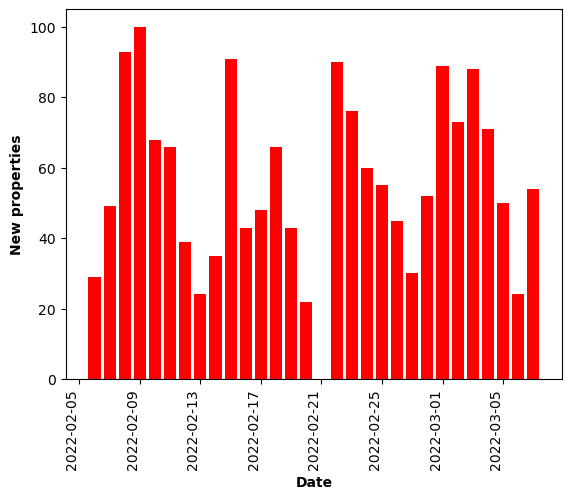

In [8]:
#Sundays are the day when least properties are published and then it starts increasing towards 
#the days reaching its peak on Wenesdays
plt.bar(data.groupby('incorporation_date').count()['price'][1:].index,data.groupby('incorporation_date').count()['price'][1:],linestyle='--',
color='r',linewidth=5)
plt.xticks(rotation=90,ha='right')
plt.ylabel('New properties',fontweight='heavy')
plt.xlabel('Date',fontweight='heavy')


In [9]:
#Market share in % for the 10 biggest agencies
#It can be seen that OpenRent and Homelike Internet GmbH are the two biggest, encompasing 33% of the market. As far 
# as I know these are short term let agencies.
# Looking at the rest of the agencies, it is evident the no agency has a dominant stake of the rent market.
market_share=data['letting_agent_name'].value_counts().head(10)/data['letting_agent_name'].value_counts().sum()
market_share=market_share.rename('Market share by agency. First 10 agencies')
market_share

OpenRent                                     0.20
Homelike Internet GmbH                       0.13
Braemore Sales and Lettings                  0.06
DJ Alexander Lettings Ltd                    0.04
Southside Property Management                0.04
Murray & Currie Property                     0.04
Grant Property                               0.04
Staykeepers                                  0.03
Zone Letting Limited                         0.02
Northwood Residential Lettings (Edinburgh)   0.02
Name: Market share by agency. First 10 agencies, dtype: float64